# Colocalization analysis using SuSiE result

This notebook take two lists of single effect Bayes factor matrices from SuSiE analysis pipeline (`SuSiE.ipynb`, `SuSiE_RSS.ipynb`) to perform colocalization using approaches described in Wallace (2021) PLoS Genetics.

## Input 


1. `qtl_tsv` : A collection of `*.lbf.tsv` file from the output of `susie_to_tsv`. Each tsv correspond to the finemapping of one gene over 1 specific cis windows. An example qtl_tsv is:
```
hs3163@csglogin:/mnt/vast/hpc/csg/xqtl_workflow_testing/susie_rss$ head /mnt/vast/hpc/csg/molecular_phenotype_calling/eqtl/output/susie_per_gene_tad/demo.ENSG00000232938.unisusie.fit.lbf.tsv
snps    cs_index        names   1       2       3       4       5       6       7       8       9       10
chr17:82284247_A_G      0       demo.ENSG00000232938    0       0       0       0       0       0       0       0       0       0
chr17:82284998_CA_CAA   0       demo.ENSG00000232938    0       0       0       0       0       0       0       0       0       0
chr17:82288151_AGAGGAGAGGCCACGTGAGCACGCAGGGAGAGGCCACATGAGGACACAGGGAAAGGTCATGTGAGGACGCAGG_AGAGAGGCCACGTGAGCACGCAGGGAGAGGCCACATGAGGACACAGGGAAAGGTCATGTGAGGACGCAGG 0       demo.ENSG00000232938    0       0       0       0       0       0       0       0       0       0
chr17:82288153_AGGAGAGGCCACGTGAGCACGCAGGGAGAGGCCACATGAGGACACAGGGAAAGGTCATGTGAGGACGCAG_* 0       demo.ENSG00000232938    0       0       0       0       0       0       0       0       0       0
chr17:82290344_G_A      0       demo.ENSG00000232938    0       0       0       0       0       0       0       0       0       0
chr17:82297982_G_A      0       demo.ENSG00000232938    0       0       0       0       0       0       0       0       0       0
chr17:82300876_C_T      0       demo.ENSG00000232938    0       0       0       0       0       0       0       0       0       0
chr17:82304926_CAAA_CAA 0       demo.ENSG00000232938    0       0       0       0       0       0       0       0       0       0
chr17:82307532_CA_CAA   0       demo.ENSG00000232938    0       0       0       0       0       0       0       0       0       0

```


2. `sumstat_tsv` : A collection of `*unisusie_rss.lbf.tsv` file from the output of `susie_to_tsv` when the input to `susie_to_tsv` is the GWAS finemapping result. Each tsv correspond to the finemapping result for all the LD block within one chromosome. An example sumstat_tsv is:
```
hs3163@csglogin:/mnt/vast/hpc/csg/xqtl_workflow_testing/susie_rss$ head output/ADGWAS_finemapping_extracted/ADGWAS2022.chr17.unisusie_rss.lbf.tsv
snps    cs_index        names   1       2       3       4       5       6       7       8       9       10
chr17:1013206_G_A       0       chr17_1013206_2799513   -1.5094462480434039     -0.5827264224153965     -0.5813062549098806     -0.581078262899337      -0.5817534545426226     -0.5829330816799259     -0.5842213053442884     -0.5852901821457883     -0.5859064726506864     -0.5859320125560782
chr17:1013226_C_T       0       chr17_1013206_2799513   -1.1295070677762176     -0.3300803772964218     -0.3291449520027623     -0.3289952523497244     -0.3294409817188384     -0.3302202231840825     -0.3310721035038142     -0.3317794573283772     -0.33218723320195775    -0.3322036317595809
chr17:1013285_G_A       0       chr17_1013206_2799513   -0.83682476474085       -0.01509711112439005    -0.014294142586458225   -0.014166314309942418   -0.014549451193273333   -0.015218908471380965   -0.015950958721425712   -0.0165589621932809     -0.016909332695473456   -0.01692287669257464
chr17:1013349_GCCGCCGTGGGGGAGGCAGGGCACACCCTGTTAC_G      0       chr17_1013206_2799513   -1.2330507101618418     -0.3202232660673907     -0.31925958120306785    -0.3191025348572505     -0.31955595255059266    -0.3203510187101217     -0.3212208091297537     -0.3219433399887148    -0.3223598041699949      -0.3223754573597304
```

3. `region_list`: A region list documenting the TSS of all genes:

```
hs3163@csglogin:/mnt/vast/hpc/csg/xqtl_workflow_testing/susie_rss$ cat test.region_list | head
#chr    start   end     gene_id
chr17   76865   76866   ENSG00000280279
chr17   181649  181650  ENSG00000272636
chr17   191586  191587  ENSG00000273172
chr17   331204  331205  ENSG00000262061
chr17   386253  386254  ENSG00000181031
```

Leveraging the fact that the results in each LD block should be independent， this module align the eqtl fine mapping result against all the gwas finemaping result in a chromosome and hence padded the eQTL result. SNP outside of the overlapped region will not be considered.

## Output:
1. A rds object containing the output of the coloc function. When there is no overlap snps/when there is no snps in the cs of the eqtl, the coloc function will retun a NA object.

2. If 1 is not NA, a summary table summarizing the coloc signals will be saved. 
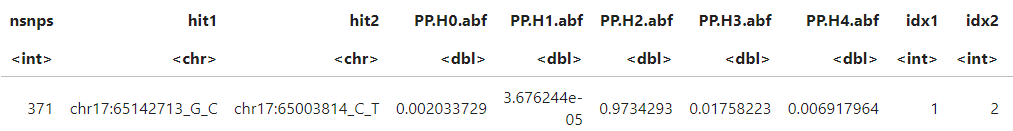

The `nsnps` columns stands for the number of snps shared by the qtl susie and the gwas susie.

The `PP.\*.abf` columns stands for the probability that following global hypothesis are not rejected. 

- H0: no association with either trait in the region
- H1: association with trait 1 only
- H2: association with trait 2 only
- H3: both traits are associated, but have different single causal variants
- H4: both traits are associated and share the same single causal variant

Please see [this paper](https://journals.plos.org/plosgenetics/article?id=10.1371/journal.pgen.1009440) for details.

### MWE

In [ ]:
sos run pipeline/coloc.ipynb coloc \
    --qtl_tsv `ls /mnt/vast/hpc/csg/molecular_phenotype_calling/eqtl/output/susie_per_gene_tad/*lbf.tsv`   \
    --sumstat_tsv `ls output/*lbf.tsv` \
    --region_list test.region_list 

In [ ]:
[global]
parameter: container = ""
# For cluster jobs, number commands to run per job
parameter: job_size = 1
# Wall clock time expected
parameter: walltime = "5h"
# Memory expected
parameter: mem = "16G"
# Number of threads
parameter: numThreads = 20
parameter: cwd = path("output")
# Get the list of susie_rss results for GWAS (The one used to pad)
parameter: sumstat_tsv= paths
# Get the susie results for qtl (The one needs to be padded)
parameter: qtl_tsv = paths
# A region_list to link the qtl results and the rss results
parameter: region_list
# if using a fix windows, specify the cis windows use
parameter: windows = 0
import pandas as pd

## The outputed test*tsv file are for debugging purpose.

sumstat_list = pd.DataFrame({"ss_path" : [str(x) for x in sumstat_tsv]})
sumstat_list["#chr"] = [f'chr{x.split(".")[-4].split("_")[0].replace("chr","")}'  for x in sumstat_list.ss_path ] ## Add chr if there is no chr prefix. This is to accommodate chr XY and M
#sumstat_list.to_csv("test6.tsv","\t")
qtl_list = pd.DataFrame({"qtl_path" : [str(x) for x in qtl_tsv], "gene_id" : [str(x).split(".")[-5] for x in qtl_tsv] })
#qtl_list.to_csv("test5.tsv","\t")

region_list = pd.read_csv(region_list,"\t").merge(qtl_list, on = "gene_id").merge(sumstat_list , on = "#chr")
#region_list.to_csv("test4.tsv","\t")
input_list = region_list[["ss_path","qtl_path"]].values.tolist()
region_list = region_list.to_dict("records")

In [ ]:
[coloc]
input: input_list, group_by = 2
output: f'{cwd}/{_input[0]:bnnn}.{_input[1]:bnnn}.coloc.rds'
task: trunk_workers = 1, trunk_size = job_size, walltime = walltime, mem = mem, cores = numThreads, tags = f'{step_name}_{_output:bn}'
R: expand = '${ }', stdout = f"{_output:nn}.stdout", stderr = f"{_output:nn}.stderr", container = container
    library(coloc)
    library(dplyr)
    library(stringr)
    library(readr)
    library(purrr)
    
    lbf_mtx_spliting = function(df){
        list_bf = map(unique(df$names), ~df%>%filter(names == .x )%>%`colnames<-`(c("snps","cs_index","names",paste0(.x,c(1:10)))) )
        list_bf = map(list_bf,~.x%>%select(snps,ifelse(str_split(.x$cs_index[1],",")[[1]]!="0", paste0(.x$names[[1]], str_split(.x$cs_index[1],",")[[1]] ) ,"snps" )))
        new_bf = bind_rows(list_bf)%>%replace(is.na(.), 0)
        new_bf = new_bf %>%select(-snps)%>%t%>%`colnames<-`(new_bf$snps)
        return(new_bf)                           
    }
    
    gwas <- read_delim(file = "${_input[0]}")
    qtl <- read_delim(file = "${_input[1]}")
    ## Match the variants
    intersct = intersect(gwas$snps, qtl$snps)
    message("Using ", length(intersct), "/ ", nrow(qtl), 
        " and ", nrow(gwas), " available")
    gwas_bf = gwas%>%filter(snps %in% intersct )%>%lbf_mtx_spliting()
    qtl_bf = qtl%>%filter(snps %in% intersct )%>%lbf_mtx_spliting()
    
    coloc_result <- coloc.bf_bf(bf1=gwas_bf, bf2=qtl_bf)
    coloc_result$summary = coloc_result$summary%>%mutate("qtl_region" = paste0(unique(qtl$names),",") ,
                                       "qtl_files" = "${_input[1]}" ,"gwas_files" = "${_input[0]:a}" )
    coloc_result$summary%>%readr::write_delim("${_output:n}.summary.tsv")
    coloc_result%>%saveRDS("${_output}")